# __Information Extraction From Scientific Publication__


## Team's Name:
**aimeetscybersecurity**

## Team Members Name:
**RIBENCE KADEL**

**PRATYUSH PATTNAIK**

**PHAM NHAT HAO**

**MUTHUKUMARAN AZHAGESAN**

**PAUL WOJTANEK**

## Introduction:

![Blue White Simple Business Linkedln Banner.jpg](https://i.postimg.cc/TP6rn7Mk/Blue-White-Simple-Business-Linkedln-Banner.png)

### NER (Named Entity Recognition) is the task of identifying and classifying crucial data (entities) in text. It is also known as entity stacking, retrieval, or identification. Any term or a group of words that continuously refers to the same thing can be considered an entity. Every detected entity is assigned to one of several categories.

# Abstract


Datasets with text fragments from astrophysics papers, provided by the NASA Astrophysics Data System with manually tagged astronomical facilities and other entities of interest.

## Problem Statement :<br>
### We have to build a Name Entity Recognition Model that seeks to locate and classify named entities mentioned in unstructured text into predefined categories in the WIESP dataset. <br>

## Steps to take : <br>
<b>Step A</b>: Taking a look at the data and data pre-processing.<br>
<b>Step B</b>: Building different models using RNN.<br>
<b>Step C</b>: Applying tranfer learning.<br>
<b>Step D</b>: Comaring results and conclusion.<br>

## Step A : Taking a look at the data and data pre-processing :

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json
# Tensorflow imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import backend as K
from tensorflow.keras.models import Model

from pandas import json_normalize

In [ ]:
import re

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


### Data loading

In [ ]:
with open("/content/gdrive/MyDrive/AI3 Project/A13/WIESP2022-NER-DEV.jsonl", 'r') as f:
  wiesp_dev_json = [json.loads(l) for l in list(f)]


In [ ]:
with open("/content/gdrive/MyDrive/AI3 Project/A13/WIESP2022-NER-TRAINING.jsonl", 'r') as f:
  wiesp_traning_json = [json.loads(l) for l in list(f)]

In [ ]:
with open("/content/gdrive/MyDrive/AI3 Project/A13/WIESP2022-NER-VALIDATION-NO-LABELS.jsonl", 'r') as f:
  wiesp_val_json = [json.loads(l) for l in list(f)]

In [ ]:
with open('/content/gdrive/MyDrive/AI3 Project/A13/ner_tags.json','r') as json_file:
    tag_dict = json.load(json_file)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Processing and cleaning the data

In [ ]:
df_dev = json_normalize(wiesp_dev_json)
df_dev.head(5)

,bibcode,label_studio_id,ner_ids,ner_tags,section,tokens,unique_id
0,2019MNRAS.486.5558S,487,"[62, 62, 62, 62, 62, 62, 62, 15, 62, 62, 62, 6...","[O, O, O, O, O, O, O, B-Instrument, O, O, O, O...",fulltext,"[Whilst, a, reasonable, harmonic, fit, to, the...",fulltext_487_2019MNRAS.486.5558S
1,2018MNRAS.480.3062L,1086,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",acknowledgments,"[ACKNOWLEDGEMENTS, The, authors, thank, an, an...",acknowledgments_1086_2018MNRAS.480.3062L
2,2019MNRAS.482L...9B,559,"[62, 62, 62, 22, 53, 22, 53, 22, 53, 22, 53, 2...","[O, O, O, B-Person, I-Person, B-Person, I-Pers...",acknowledgments,"[ACKNOWLEDGEMENTS, We, thank, Dougal, Mackey,,...",acknowledgments_559_2019MNRAS.482L...9B
3,2018A&A...617A..26D,1307,"[4, 35, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62...","[B-Citation, I-Citation, O, O, O, O, O, O, O, ...",fulltext,"[Lasota, (2007), have, updated, this, work,, f...",fulltext_1307_2018A&A...617A..26D
4,2017ApJ...840...33S,465,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",fulltext,"[an, antenna, with, cos, 2, beam, would, have,...",fulltext_465_2017ApJ...840...33S


**As we can see, unique_id is a combination of bibcode, label_studio and section, we can drop the three**

In [ ]:
df_dev_after_dropping=df_dev.drop(['bibcode','label_studio_id','section'],axis=1)

In [ ]:
df_dev_after_dropping.head()

,ner_ids,ner_tags,tokens,unique_id
0,"[62, 62, 62, 62, 62, 62, 62, 15, 62, 62, 62, 6...","[O, O, O, O, O, O, O, B-Instrument, O, O, O, O...","[Whilst, a, reasonable, harmonic, fit, to, the...",fulltext_487_2019MNRAS.486.5558S
1,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[ACKNOWLEDGEMENTS, The, authors, thank, an, an...",acknowledgments_1086_2018MNRAS.480.3062L
2,"[62, 62, 62, 22, 53, 22, 53, 22, 53, 22, 53, 2...","[O, O, O, B-Person, I-Person, B-Person, I-Pers...","[ACKNOWLEDGEMENTS, We, thank, Dougal, Mackey,,...",acknowledgments_559_2019MNRAS.482L...9B
3,"[4, 35, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62...","[B-Citation, I-Citation, O, O, O, O, O, O, O, ...","[Lasota, (2007), have, updated, this, work,, f...",fulltext_1307_2018A&A...617A..26D
4,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[an, antenna, with, cos, 2, beam, would, have,...",fulltext_465_2017ApJ...840...33S


In [ ]:
df_training = json_normalize(wiesp_traning_json)
df_training.head(5)

,bibcode,label_studio_id,ner_ids,ner_tags,section,tokens,unique_id
0,2019MNRAS.486.5558S,487,"[62, 62, 62, 62, 62, 62, 62, 15, 62, 62, 62, 6...","[O, O, O, O, O, O, O, B-Instrument, O, O, O, O...",fulltext,"[Whilst, a, reasonable, harmonic, fit, to, the...",fulltext_487_2019MNRAS.486.5558S
1,2018MNRAS.478.5533F,1129,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",fulltext,"[comparison, once, the, angular, positions, of...",fulltext_1129_2018MNRAS.478.5533F
2,2018MNRAS.480.3062L,1086,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",acknowledgments,"[ACKNOWLEDGEMENTS, The, authors, thank, an, an...",acknowledgments_1086_2018MNRAS.480.3062L
3,2016MNRAS.457.1786M,1135,"[22, 62, 62, 62, 62, 21, 13, 44, 44, 21, 62, 1...","[B-Person, O, O, O, O, B-Organization, B-Grant...",acknowledgments,"[BDM, gratefully, acknowledges, support, from,...",acknowledgments_1135_2016MNRAS.457.1786M
4,2019MNRAS.482L...9B,559,"[62, 62, 62, 22, 53, 22, 53, 22, 53, 22, 53, 2...","[O, O, O, B-Person, I-Person, B-Person, I-Pers...",acknowledgments,"[ACKNOWLEDGEMENTS, We, thank, Dougal, Mackey,,...",acknowledgments_559_2019MNRAS.482L...9B


In [ ]:
df_training_after_dropping=df_training.drop(['bibcode','label_studio_id','section'],axis=1)

In [ ]:
df_training_after_dropping.head()

,ner_ids,ner_tags,tokens,unique_id
0,"[62, 62, 62, 62, 62, 62, 62, 15, 62, 62, 62, 6...","[O, O, O, O, O, O, O, B-Instrument, O, O, O, O...","[Whilst, a, reasonable, harmonic, fit, to, the...",fulltext_487_2019MNRAS.486.5558S
1,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[comparison, once, the, angular, positions, of...",fulltext_1129_2018MNRAS.478.5533F
2,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[ACKNOWLEDGEMENTS, The, authors, thank, an, an...",acknowledgments_1086_2018MNRAS.480.3062L
3,"[22, 62, 62, 62, 62, 21, 13, 44, 44, 21, 62, 1...","[B-Person, O, O, O, O, B-Organization, B-Grant...","[BDM, gratefully, acknowledges, support, from,...",acknowledgments_1135_2016MNRAS.457.1786M
4,"[62, 62, 62, 22, 53, 22, 53, 22, 53, 22, 53, 2...","[O, O, O, B-Person, I-Person, B-Person, I-Pers...","[ACKNOWLEDGEMENTS, We, thank, Dougal, Mackey,,...",acknowledgments_559_2019MNRAS.482L...9B


In [ ]:
df_validation = json_normalize(wiesp_val_json)
df_validation.head(5)

,bibcode,label_studio_id,section,tokens,unique_id
0,2016A&A...586A.140P,1778,fulltext,"[that, gas, outside, halos,, not, necessarily,...",fulltext_1778_2016A&A...586A.140P
1,2017ApJ...842..123F,1466,fulltext,"[that, all, star, formation, within, Upper, Sc...",fulltext_1466_2017ApJ...842..123F
2,2019ApJ...882L...1F,1015,fulltext,"[the, PCs, would, contain, the, changes., Mate...",fulltext_1015_2019ApJ...882L...1F
3,2018MNRAS.475.3029T,72,fulltext,"[arcmin, away,, in, a, low, density, environme...",fulltext_72_2018MNRAS.475.3029T
4,2019ApJ...876..136J,57,acknowledgments,"[We, are, grateful, to, J., Chen,, J., Delabro...",acknowledgments_57_2019ApJ...876..136J


In [ ]:
df_validation_after_dropping=df_validation.drop(['bibcode','label_studio_id','section'],axis=1)

In [ ]:
df_validation_after_dropping.head()

,tokens,unique_id
0,"[that, gas, outside, halos,, not, necessarily,...",fulltext_1778_2016A&A...586A.140P
1,"[that, all, star, formation, within, Upper, Sc...",fulltext_1466_2017ApJ...842..123F
2,"[the, PCs, would, contain, the, changes., Mate...",fulltext_1015_2019ApJ...882L...1F
3,"[arcmin, away,, in, a, low, density, environme...",fulltext_72_2018MNRAS.475.3029T
4,"[We, are, grateful, to, J., Chen,, J., Delabro...",acknowledgments_57_2019ApJ...876..136J


**Creating a dataframe of tag dictionary with encodings**

In [ ]:
tag_dictionary = [{'B-Archive': 0, 'B-CelestialObject': 1, 'B-CelestialObjectRegion': 2, 'B-CelestialRegion': 3, 'B-Citation': 4, 'B-Collaboration': 5, 'B-ComputingFacility': 6, 'B-Database': 7, 'B-Dataset': 8, 'B-EntityOfFutureInterest': 9, 'B-Event': 10, 'B-Fellowship': 11, 'B-Formula': 12, 'B-Grant': 13, 'B-Identifier': 14, 'B-Instrument': 15, 'B-Location': 16, 'B-Mission': 17, 'B-Model': 18, 'B-ObservationalTechniques': 19, 'B-Observatory': 20, 'B-Organization': 21, 'B-Person': 22, 'B-Proposal': 23, 'B-Software': 24, 'B-Survey': 25, 'B-Tag': 26, 'B-Telescope': 27, 'B-TextGarbage': 28, 'B-URL': 29, 'B-Wavelength': 30, 'I-Archive': 31, 'I-CelestialObject': 32, 'I-CelestialObjectRegion': 33, 'I-CelestialRegion': 34, 'I-Citation': 35, 'I-Collaboration': 36, 'I-ComputingFacility': 37, 'I-Database': 38, 'I-Dataset': 39, 'I-EntityOfFutureInterest': 40, 'I-Event': 41, 'I-Fellowship': 42, 'I-Formula': 43, 'I-Grant': 44, 'I-Identifier': 45, 'I-Instrument': 46, 'I-Location': 47, 'I-Mission': 48, 'I-Model': 49, 'I-ObservationalTechniques': 50, 'I-Observatory': 51, 'I-Organization': 52, 'I-Person': 53, 'I-Proposal': 54, 'I-Software': 55, 'I-Survey': 56, 'I-Tag': 57, 'I-Telescope': 58, 'I-TextGarbage': 59, 'I-URL': 60, 'I-Wavelength': 61, 'O': 62}]
df_tag_dictionary = pd.DataFrame.from_dict(tag_dictionary)
df_tag_dictionary.head(5)

,B-Archive,B-CelestialObject,B-CelestialObjectRegion,B-CelestialRegion,B-Citation,B-Collaboration,B-ComputingFacility,B-Database,B-Dataset,B-EntityOfFutureInterest,...,I-Person,I-Proposal,I-Software,I-Survey,I-Tag,I-Telescope,I-TextGarbage,I-URL,I-Wavelength,O
0,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62


***Here, we can see that the tags follow IOB2 convention where B- tag if the starting point for every chunk***

Reference: https://datascience.stackexchange.com/questions/37824/difference-between-iob-and-iob2-format

### Let's explore the data :

**Checking the the number of B-,I- and O tags in the tags dataset**

In [ ]:
b_tags=0
I_tags=0
o_tags=0
for i in tag_dict.keys():
  if(i.split('-')[0]=='B'):
    b_tags+=1
  elif(i.split('-')[0]=='I'):
    I_tags+=1
  else:
    o_tags+=1


In [ ]:
print(f'The number of b_tags, i_tags and o-tags are {b_tags},{I_tags},{o_tags}')

The number of b_tags, i_tags and o-tags are 31,31,1


**Checking the distribution of tags in the training dataset**

In [ ]:

no_of_o_tags=0
no_of_b_tags=0
no_of_i_tags=0
o_per_sentence=[]
b_per_sentence=[]
i_per_sentence=[]

for l in range(len(df_training_after_dropping.ner_tags)):
  tag_list=df_training_after_dropping.ner_tags[l]
  per_sentence_o=0
  per_sentence_b=0
  per_sentence_i=0
  for t in tag_list:
    if t=='O':
      per_sentence_o+=1
      no_of_o_tags+=1
    elif t.split("-")[0]=='B':
      per_sentence_b+=1
      no_of_b_tags+=1
    else:
      per_sentence_i+=1
      no_of_i_tags+=1
  
  o_per_sentence.append(per_sentence_o)
  b_per_sentence.append(per_sentence_b)
  i_per_sentence.append(per_sentence_i)

**Plotting average number of o tags,b tags , i tags in each sentence**

Text(0.5, 1.0, 'Average number of tags present in each sentence of the training dataset')

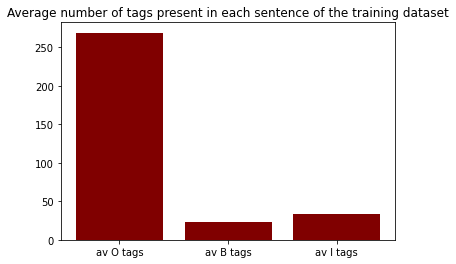

In [ ]:
plt.bar(['av O tags','av B tags','av I tags'],[int(np.mean(o_per_sentence)),int(np.mean(b_per_sentence)),int(np.mean(i_per_sentence))],color='maroon')
plt.title('Average number of tags present in each sentence of the training dataset')

**We have a highly imbalanced dataset because in each sentence, the number of O tags is relatively large as compared to B and I tags**

**We will use proper accuracy metrics for this imbalanced dataset**

In [ ]:
df_training_after_dropping.head()

,ner_ids,ner_tags,tokens,unique_id
0,"[62, 62, 62, 62, 62, 62, 62, 15, 62, 62, 62, 6...","[O, O, O, O, O, O, O, B-Instrument, O, O, O, O...","[Whilst, a, reasonable, harmonic, fit, to, the...",fulltext_487_2019MNRAS.486.5558S
1,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[comparison, once, the, angular, positions, of...",fulltext_1129_2018MNRAS.478.5533F
2,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[ACKNOWLEDGEMENTS, The, authors, thank, an, an...",acknowledgments_1086_2018MNRAS.480.3062L
3,"[22, 62, 62, 62, 62, 21, 13, 44, 44, 21, 62, 1...","[B-Person, O, O, O, O, B-Organization, B-Grant...","[BDM, gratefully, acknowledges, support, from,...",acknowledgments_1135_2016MNRAS.457.1786M
4,"[62, 62, 62, 22, 53, 22, 53, 22, 53, 22, 53, 2...","[O, O, O, B-Person, I-Person, B-Person, I-Pers...","[ACKNOWLEDGEMENTS, We, thank, Dougal, Mackey,,...",acknowledgments_559_2019MNRAS.482L...9B


**Investigating the frequency of different ner tags in the dataset**

In [ ]:
dict_tags_ner={}

for row in df_training_after_dropping.ner_tags:
  for item in row:
    if item not in dict_tags_ner.keys():
      dict_tags_ner[item]=1
    else:
      dict_tags_ner[item]+=1

In [ ]:
dict_tags_ner

{'O': 472307,
 'B-Instrument': 714,
 'B-Mission': 110,
 'B-Citation': 6360,
 'I-Citation': 18402,
 'B-Telescope': 1573,
 'B-Wavelength': 3384,
 'I-Wavelength': 1583,
 'B-Model': 1800,
 'I-Model': 1244,
 'B-Software': 1017,
 'I-Software': 472,
 'B-Formula': 2088,
 'I-Formula': 8433,
 'B-Person': 3916,
 'B-Organization': 7448,
 'I-Organization': 14211,
 'B-Fellowship': 411,
 'I-Fellowship': 1015,
 'B-Grant': 3478,
 'I-Grant': 4080,
 'I-Person': 2206,
 'B-Location': 1404,
 'I-Location': 467,
 'B-Event': 45,
 'I-Event': 176,
 'B-URL': 294,
 'B-Collaboration': 306,
 'I-Collaboration': 598,
 'B-CelestialObject': 2940,
 'I-CelestialObject': 1691,
 'B-Dataset': 328,
 'I-Dataset': 368,
 'B-CelestialObjectRegion': 265,
 'I-CelestialObjectRegion': 223,
 'B-TextGarbage': 52,
 'I-TextGarbage': 54,
 'B-Survey': 885,
 'B-ObservationalTechniques': 124,
 'I-ObservationalTechniques': 74,
 'B-ComputingFacility': 399,
 'I-ComputingFacility': 809,
 'I-Survey': 573,
 'I-Telescope': 607,
 'B-Observatory': 87

In [ ]:
dict_tags_ner_without_o=dict_tags_ner.copy()

In [ ]:
del dict_tags_ner_without_o['O']

In [ ]:
dict_tags_ner_without_o={k: v for k, v in sorted(dict_tags_ner_without_o.items(), key=lambda item: item[1],reverse=True)}

Text(0.5, 1.0, 'Frequency of tags present in the training set')

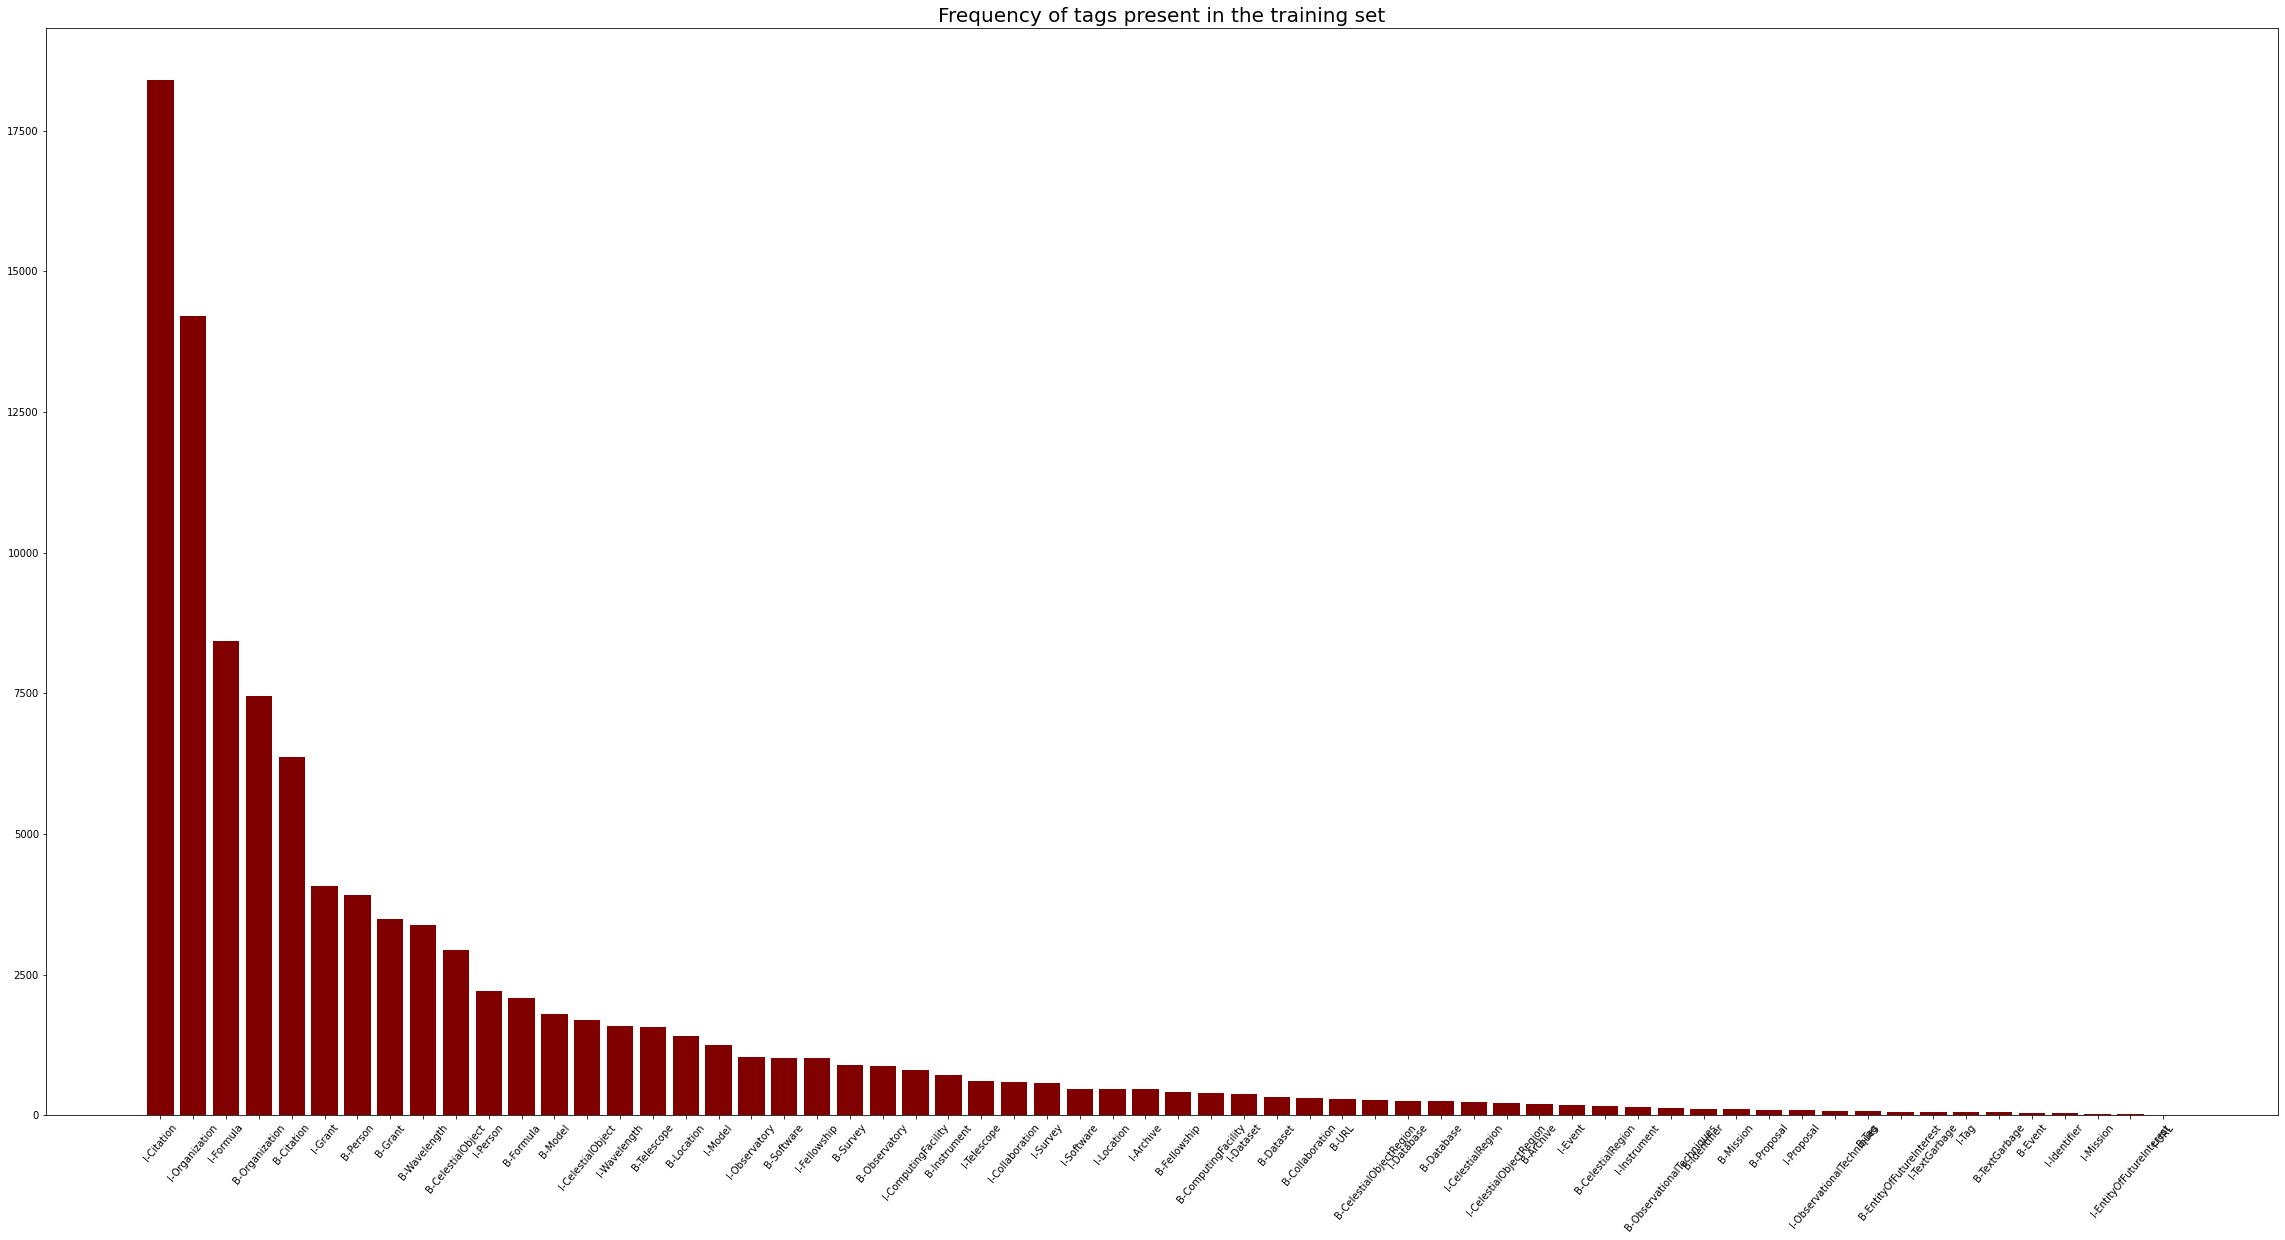

In [ ]:
# We want to see the frequency of different tags present in our training set
plt.subplots(1,1,figsize=(40,20))
plt.bar(dict_tags_ner_without_o.keys(), dict_tags_ner_without_o.values(),color="maroon")
plt.xticks(rotation = 50)
plt.title('Frequency of tags present in the training set',fontsize=20)

**Creating a vocabulary out of the tokens in the training dataset**

In [ ]:
vocabulary=[]

for row in df_training_after_dropping.tokens:
  for i in row:
    vocabulary.append(i.lower())



In [ ]:
len(vocabulary)

573132

In [ ]:
unique_vocab=list(set(vocabulary))

In [ ]:
len(unique_vocab)

45753

In [ ]:
appended_unique_vocab=unique_vocab.copy()

In [ ]:
appended_unique_vocab.append("endpad")

In [ ]:
len(appended_unique_vocab)

45754

**Our vocab contains 45753 unique words**

In [ ]:
# Creating a lookup dictionary to convert from index to word and word to index
idx2token = {(idx+2):token for  idx, token in enumerate(unique_vocab)}
token2idx = {token:(idx+2) for  idx, token in enumerate(unique_vocab)}

**Creating tokenizers to convert into numerical representation**

In [ ]:
# Since the tokens are strings,we will convert each row in the tokens column of our dataset into sequences of numbers
Tokenizer_for_tokens = tf.keras.preprocessing.text.Tokenizer(num_words=len(unique_vocab),filters= None,lower=True,char_level=False,oov_token=None)

In [ ]:
Tokenizer_for_tokens.fit_on_texts(df_training_after_dropping.tokens)

In [ ]:
# Since the ner_tags are strings,we will convert each row in the ner_tags column of our dataset into sequences of numbers
Tokenizer_for_tags = tf.keras.preprocessing.text.Tokenizer(num_words=len(dict_tags_ner),filters= None,lower=True,char_level=False,oov_token=None)

In [ ]:
Tokenizer_for_tags.fit_on_texts(df_training_after_dropping.ner_tags)

In [ ]:
token_sequences = Tokenizer_for_tokens.texts_to_sequences(df_training_after_dropping.tokens)
ner_tag_seqeunces = Tokenizer_for_tags.texts_to_sequences(df_training_after_dropping.ner_tags)


**We will choose the max length of sequences which we want to pass into our model and that will be the average length of all lengths in our training dataset**

**Finding maximum length first**

In [ ]:
maxlength=df_training_after_dropping['tokens'].str.len().agg(['max'])

**Let's keep the maxlen while padding equal to 400 which is approximately half the maxlength**

In [ ]:
padding_token = tf.keras.preprocessing.sequence.pad_sequences(token_sequences, maxlen=400, padding='post', truncating='post').reshape(-1,400)
padding_ner= tf.keras.preprocessing.sequence.pad_sequences(ner_tag_seqeunces, maxlen=400, padding='post', truncating='post').reshape(-1,400)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(padding_token,padding_ner,test_size=0.3,random_state=42)

In [ ]:
x_train.shape

(1227, 400)

In [ ]:
df_training_after_dropping.head()

,ner_ids,ner_tags,tokens,unique_id
0,"[62, 62, 62, 62, 62, 62, 62, 15, 62, 62, 62, 6...","[O, O, O, O, O, O, O, B-Instrument, O, O, O, O...","[Whilst, a, reasonable, harmonic, fit, to, the...",fulltext_487_2019MNRAS.486.5558S
1,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[comparison, once, the, angular, positions, of...",fulltext_1129_2018MNRAS.478.5533F
2,"[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 6...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...","[ACKNOWLEDGEMENTS, The, authors, thank, an, an...",acknowledgments_1086_2018MNRAS.480.3062L
3,"[22, 62, 62, 62, 62, 21, 13, 44, 44, 21, 62, 1...","[B-Person, O, O, O, O, B-Organization, B-Grant...","[BDM, gratefully, acknowledges, support, from,...",acknowledgments_1135_2016MNRAS.457.1786M
4,"[62, 62, 62, 22, 53, 22, 53, 22, 53, 22, 53, 2...","[O, O, O, B-Person, I-Person, B-Person, I-Pers...","[ACKNOWLEDGEMENTS, We, thank, Dougal, Mackey,,...",acknowledgments_559_2019MNRAS.482L...9B


In [ ]:
! pip install cohere

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for cohere: filename=cohere-2.8.0-cp37-cp37m-linux_x86_64.whl size=10956 sha256=3ffe58fcbd9c33243126a93915236d25748cc159bbd2ea6aa8b919d7f04264b5
  Stored in directory: /root/.cache/pip/wheels/85/bd/8e/65048fd92114861be1984d02d48bf68b8f2475185178600024
Successfully built cohere


In [ ]:
!pip install cohere requests tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
api_key = "A86CHp8yaRIkK8dLkHzNz32OapbKNp0LHRxgR58A"

In [ ]:
import cohere
co = cohere.Client(api_key)

In [ ]:
# Collate the examples via the Example module
from cohere.classify import Example
examples = list()
for txt, lbl in zip(ex_texts,ex_labels):
  examples.append(Example(txt,lbl))
  
# Perform classification
def classify_text(text,examples):
  classifications = co.classify(
    model='medium',
    inputs=[text],
    examples=examples
    )
  return classifications.classifications[0].prediction


## Step B: Building Different models :

### Trying simple RNN model:

In [ ]:
from tensorflow.keras import layers

In [ ]:
inputs_to_base=tf.keras.Input((400,))
embedding_layer=tf.keras.layers.Embedding(input_dim=len(unique_vocab)+1,output_dim=400,mask_zero=True)(inputs_to_base)
first_rnn_layer=tf.keras.layers.SimpleRNN(400,return_sequences=True)(embedding_layer)
second_rnn_layer=tf.keras.layers.SimpleRNN(400,return_sequences=True)(first_rnn_layer)
outputs_from_base=tf.keras.layers.Dense(63,activation='softmax')(second_rnn_layer)
model=tf.keras.Model(inputs_to_base,outputs_from_base)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 400)]             0         
                                                                 
 embedding (Embedding)       (None, 400, 400)          18301600  
                                                                 
 simple_rnn (SimpleRNN)      (None, 400, 400)          320400    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 400, 400)          320400    
                                                                 
 dense (Dense)               (None, 400, 63)           25263     
                                                                 
Total params: 18,967,663
Trainable params: 18,967,663
Non-trainable params: 0
_________________________________________________________________


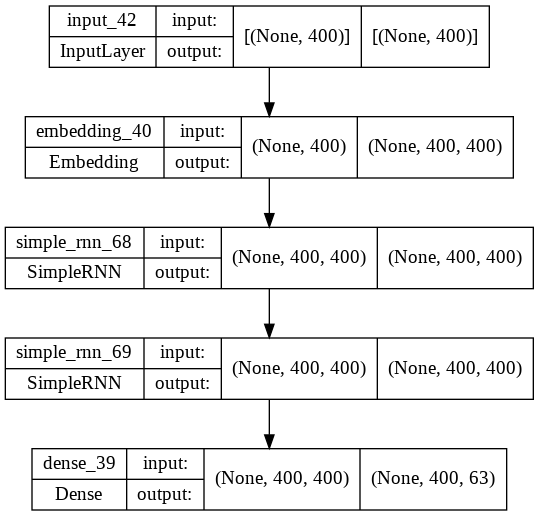

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)]

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1227, 400), (1227, 400), (526, 400), (526, 400))

In [ ]:
history = model.fit(x_train,y_train,epochs=40,batch_size=40,validation_split=0.2,callbacks=my_callbacks)

Epoch 1/40
25/25 [==============================] - 132s 3s/step - loss: 0.8797 - accuracy: 0.7800 - val_loss: 0.6864 - val_accuracy: 0.8204
Epoch 2/40
25/25 [==============================] - 81s 3s/step - loss: 0.7299 - accuracy: 0.8084 - val_loss: 0.7030 - val_accuracy: 0.8167
Epoch 3/40
25/25 [==============================] - 80s 3s/step - loss: 0.7744 - accuracy: 0.7974 - val_loss: 0.7792 - val_accuracy: 0.7977
Epoch 4/40
25/25 [==============================] - 80s 3s/step - loss: 0.6455 - accuracy: 0.8162 - val_loss: 0.4695 - val_accuracy: 0.8537
Epoch 5/40
25/25 [==============================] - 84s 3s/step - loss: 0.4207 - accuracy: 0.8561 - val_loss: 0.4163 - val_accuracy: 0.8629
Epoch 6/40
25/25 [==============================] - 80s 3s/step - loss: 0.3556 - accuracy: 0.8726 - val_loss: 0.3898 - val_accuracy: 0.8697
Epoch 7/40
25/25 [==============================] - 79s 3s/step - loss: 0.3104 - accuracy: 0.8866 - val_loss: 0.3703 - val_accuracy: 0.8784
Epoch 8/40
25/25 [=

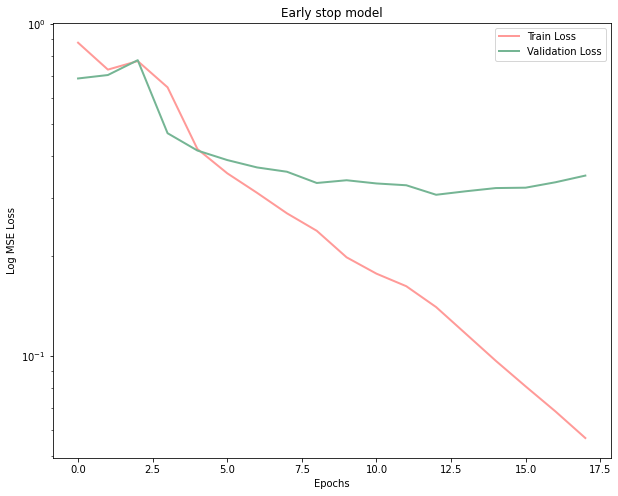

In [ ]:
# Helper function to plot the data
# Plot the loss of the model
plt.rcParams["figure.figsize"] = (10,8)
plt.title("Early stop model")
plt.semilogy(history.history['loss'], label='Train Loss', color='#FF9A98', linewidth=2)
plt.semilogy(history.history['val_loss'],  label='Validation Loss', color='#75B594', linewidth=2)
plt.legend()

# Set the axes labels
plt.xlabel('Epochs')
plt.ylabel('Log MSE Loss')
plt.legend()
plt.show()

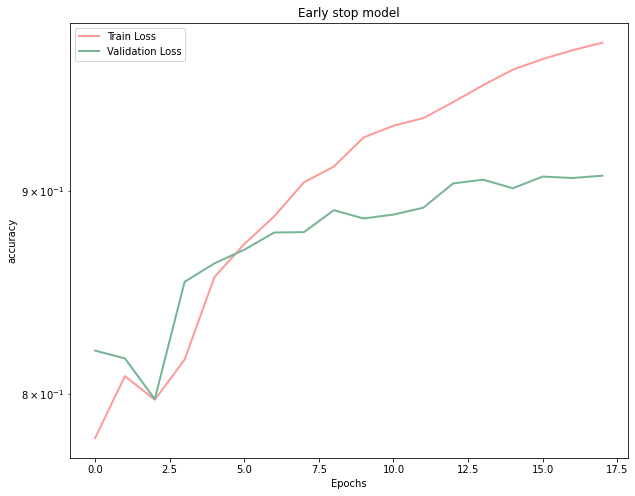

In [ ]:
# Helper function to plot the data
# Plot the accuracy of the model
plt.rcParams["figure.figsize"] = (10,8)
plt.title("Early stop model")
plt.semilogy(history.history['accuracy'], label='Train Loss', color='#FF9A98', linewidth=2)
plt.semilogy(history.history['val_accuracy'],  label='Validation Loss', color='#75B594', linewidth=2)
plt.legend()

# Set the axes labels
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
model.save_weights('/content/gdrive/MyDrive/AI3 Project/A13/base_model_63_nodes.h5')

In [ ]:
model.load_weights('/content/gdrive/MyDrive/AI3 Project/A13/base_model_63_nodes.h5')

In [ ]:
# Evaluating on test set
model.evaluate(x_test,y_test)

17/17 [==============================] - 11s 653ms/step - loss: 0.2942 - accuracy: 0.9034


[0.29420366883277893, 0.9033576250076294]

**Comparing the orginal and predicted ner_tags**

In [ ]:
for i in range(5):
  y_pred = model.predict(np.array([x_test[i]]))
  pred = np.argmax(np.array(y_pred), axis=-1)
  print("Original  : ",[*map(Tokenizer_for_tags.index_word.get, y_test[i])])
  print("predicted : ",[*map(Tokenizer_for_tags.index_word.get, pred[0])])
  print("-"*100)

Original  :  ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'b-celestialobject', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'b-model', 'i-model', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'

### BI-Directional LSTM :

https://www.kaggle.com/code/shahad001/named-entity-recognition-ner

In [ ]:
model_bidirectional_lstm = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=len(unique_vocab)+1,output_dim=400,mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(63, activation='softmax'))
])

In [ ]:
model_bidirectional_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 400)         18301600  
                                                                 
 bidirectional (Bidirectiona  (None, None, 200)        400800    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 200)        240800    
 nal)                                                            
                                                                 
 time_distributed (TimeDistr  (None, None, 63)         12663     
 ibuted)                                                         
                                                                 
Total params: 18,955,863
Trainable params: 18,955,863
Non-trainable params: 0
____________________________________________

In [ ]:
model_bidirectional_lstm.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history_bidirectional_lstm = model_bidirectional_lstm.fit(x_train,y_train,epochs=40,batch_size=40,validation_split=0.2,callbacks=my_callbacks)

Epoch 1/40
25/25 [==============================] - 128s 4s/step - loss: 1.3018 - accuracy: 0.7741 - val_loss: 0.6948 - val_accuracy: 0.8205
Epoch 2/40
25/25 [==============================] - 100s 4s/step - loss: 0.7168 - accuracy: 0.8096 - val_loss: 0.6660 - val_accuracy: 0.8205
Epoch 3/40
25/25 [==============================] - 100s 4s/step - loss: 0.6781 - accuracy: 0.8097 - val_loss: 0.5901 - val_accuracy: 0.8213
Epoch 4/40
25/25 [==============================] - 101s 4s/step - loss: 0.5676 - accuracy: 0.8168 - val_loss: 0.4866 - val_accuracy: 0.8371
Epoch 5/40
25/25 [==============================] - 100s 4s/step - loss: 0.4443 - accuracy: 0.8511 - val_loss: 0.3929 - val_accuracy: 0.8637
Epoch 6/40
25/25 [==============================] - 101s 4s/step - loss: 0.3504 - accuracy: 0.8711 - val_loss: 0.3474 - val_accuracy: 0.8789
Epoch 7/40
25/25 [==============================] - 101s 4s/step - loss: 0.2946 - accuracy: 0.8909 - val_loss: 0.3280 - val_accuracy: 0.8851
Epoch 8/40
25

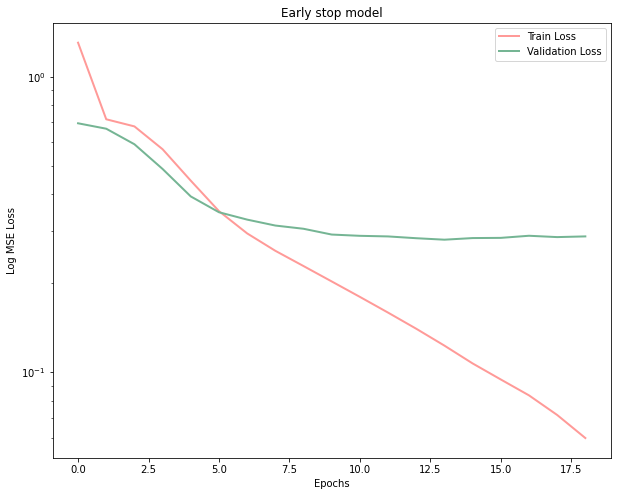

In [ ]:
# Helper function to plot the data
# Plot the loss of the model
plt.rcParams["figure.figsize"] = (10,8)
plt.title("Early stop model")
plt.semilogy(history_bidirectional_lstm.history['loss'], label='Train Loss', color='#FF9A98', linewidth=2)
plt.semilogy(history_bidirectional_lstm.history['val_loss'],  label='Validation Loss', color='#75B594', linewidth=2)
plt.legend()

# Set the axes labels
plt.xlabel('Epochs')
plt.ylabel('Log MSE Loss')
plt.legend()
plt.show()

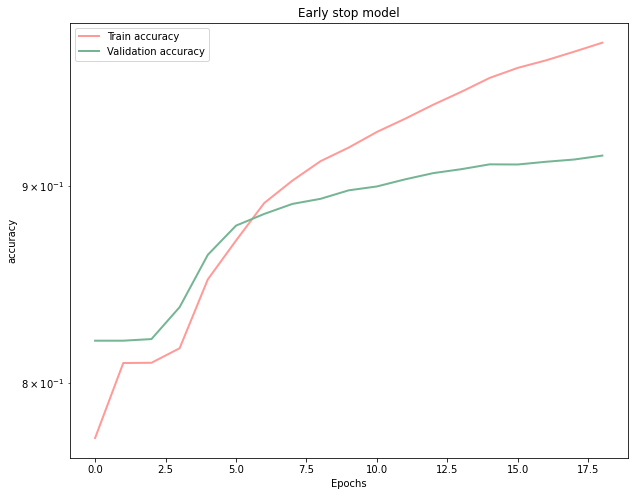

In [ ]:
# Helper function to plot the data
# Plot the loss of the model
plt.rcParams["figure.figsize"] = (10,8)
plt.title("Early stop model")
plt.semilogy(history_bidirectional_lstm.history['accuracy'], label='Train accuracy', color='#FF9A98', linewidth=2)
plt.semilogy(history_bidirectional_lstm.history['val_accuracy'],  label='Validation accuracy', color='#75B594', linewidth=2)
plt.legend()

# Set the axes labels
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluating on test set
model_bidirectional_lstm.evaluate(x_test,y_test)

17/17 [==============================] - 13s 705ms/step - loss: 0.2789 - accuracy: 0.9075


[0.27887770533561707, 0.9074718952178955]

In [ ]:
model_bidirectional_lstm.save_weights('/content/gdrive/MyDrive/AI3 Project/model_lstm.h5')

In [ ]:
model_bidirectional_lstm.load_weights('/content/gdrive/MyDrive/AI3 Project/model_lstm.h5')

**To evaluate on a test sample**

In [ ]:
for i in range(5):
  y_pred = model_bidirectional_lstm.predict(np.array([x_test[i]]))
  pred = np.argmax(np.array(y_pred), axis=-1)
  print("Original  : ",[*map(Tokenizer_for_tags.index_word.get, y_test[i])])
  print("predicted : ",[*map(Tokenizer_for_tags.index_word.get, pred[0])])
  print("-"*100)

Original  :  ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'b-celestialobject', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'b-model', 'i-model', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'

### Bi Directional GRU :

In [ ]:
model_bidirectional_gru = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=len(unique_vocab)+1,output_dim=400,mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=100, activation='tanh', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=100, activation='tanh', return_sequences=True)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(63, activation='softmax'))
])

In [ ]:
model_bidirectional_gru.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history_bidirectional_gru = model_bidirectional_gru.fit(x_train,y_train,epochs=40,batch_size=40,validation_split=0.2,callbacks=my_callbacks)

Epoch 1/40
25/25 [==============================] - 100s 3s/step - loss: 1.3837 - accuracy: 0.7708 - val_loss: 0.6673 - val_accuracy: 0.8207
Epoch 2/40
25/25 [==============================] - 77s 3s/step - loss: 0.5849 - accuracy: 0.8144 - val_loss: 0.5030 - val_accuracy: 0.8393
Epoch 3/40
25/25 [==============================] - 75s 3s/step - loss: 0.4620 - accuracy: 0.8416 - val_loss: 0.4160 - val_accuracy: 0.8585
Epoch 4/40
25/25 [==============================] - 75s 3s/step - loss: 0.3602 - accuracy: 0.8690 - val_loss: 0.3563 - val_accuracy: 0.8785
Epoch 5/40
25/25 [==============================] - 76s 3s/step - loss: 0.2884 - accuracy: 0.8900 - val_loss: 0.3264 - val_accuracy: 0.8868
Epoch 6/40
25/25 [==============================] - 75s 3s/step - loss: 0.2381 - accuracy: 0.9082 - val_loss: 0.3146 - val_accuracy: 0.8952
Epoch 7/40
25/25 [==============================] - 75s 3s/step - loss: 0.2008 - accuracy: 0.9227 - val_loss: 0.3003 - val_accuracy: 0.9017
Epoch 8/40
25/25 [=

In [ ]:
model_bidirectional_gru.evaluate(x_test,y_test)

17/17 [==============================] - 14s 790ms/step - loss: 0.2700 - accuracy: 0.9190


[0.27000704407691956, 0.9190235137939453]

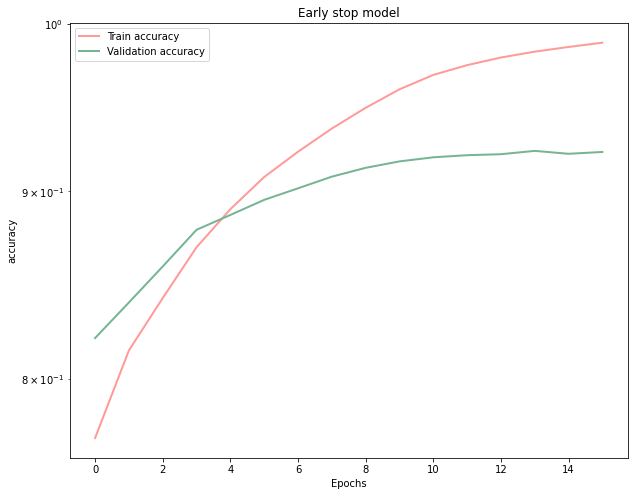

In [ ]:
# Helper function to plot the data
# Plot the loss of the model
plt.rcParams["figure.figsize"] = (10,8)
plt.title("Early stop model")
plt.semilogy(history_bidirectional_gru.history['accuracy'], label='Train accuracy', color='#FF9A98', linewidth=2)
plt.semilogy(history_bidirectional_gru.history['val_accuracy'],  label='Validation accuracy', color='#75B594', linewidth=2)
plt.legend()

# Set the axes labels
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

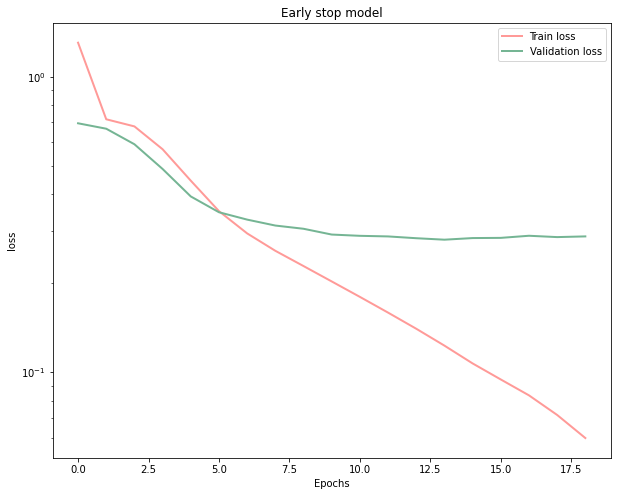

In [ ]:
# Helper function to plot the data
# Plot the loss of the model
plt.rcParams["figure.figsize"] = (10,8)
plt.title("Early stop model")
plt.semilogy(history_bidirectional_lstm.history['loss'], label='Train loss', color='#FF9A98', linewidth=2)
plt.semilogy(history_bidirectional_lstm.history['val_loss'],  label='Validation loss', color='#75B594', linewidth=2)
plt.legend()

# Set the axes labels
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model_bidirectional_gru.save_weights('/content/gdrive/MyDrive/AI3 Project/model_gru_weights.h5')

In [ ]:
model_bidirectional_gru.load_weights('/content/gdrive/MyDrive/AI3 Project/model_gru_weights.h5')

In [ ]:
for i in range(5):
  y_pred = model_bidirectional_gru.predict(np.array([x_test[i]]))
  pred = np.argmax(np.array(y_pred), axis=-1)
  print("Original  : ",[*map(Tokenizer_for_tags.index_word.get, y_test[i])])
  print("predicted : ",[*map(Tokenizer_for_tags.index_word.get, pred[0])])
  print("-"*100)

Original  :  ['o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'b-celestialobject', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'b-model', 'i-model', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o'

## Step C Transfer Learning model : Bert base cased using simple transformer** 

We have taken help from : https://www.youtube.com/watch?v=uKPBkendlxw&t=712s and also followed: https://github.com/karndeepsingh/Named-Entity-Recognition/blob/main/NAMED%20ENTITY%20RECOGNITION.ipynb

In [ ]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 250 kB 35.0 MB/s 
     |████████████████████████████████| 5.5 MB 39.1 MB/s 
     |████████████████████████████████| 1.3 MB 49.2 MB/s 
     |████████████████████████████████| 451 kB 69.3 MB/s 
     |████████████████████████████████| 43 kB 2.2 MB/s 
     |████████████████████████████████| 9.2 MB 44.4 MB/s 
     |████████████████████████████████| 7.6 MB 48.8 MB/s 
     |████████████████████████████████| 1.9 MB 48.8 MB/s 
     |████████████████████████████████| 182 kB 73.1 MB/s 
     |████████████████████████████████| 168 kB 70.6 MB/s 
     |████████████████████████████████| 182 kB 73.6 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 166 kB 67.9 MB/s 
     |████████████████████████████████| 166 kB 71.8 MB/s 
     |████████████████████████████████| 162 kB 75.3 MB/s 
     |█████████████████████████████

In [ ]:
df_training_bert=df_training[['ner_ids','ner_tags','tokens','unique_id','section']]

In [ ]:
df_training_bert_after_exploding=df_training_bert.set_index(['unique_id','section']).apply(pd.Series.explode).reset_index()

In [ ]:
df_training_bert_after_exploding.head()

,unique_id,section,ner_ids,ner_tags,tokens
0,fulltext_487_2019MNRAS.486.5558S,fulltext,62,O,Whilst
1,fulltext_487_2019MNRAS.486.5558S,fulltext,62,O,a
2,fulltext_487_2019MNRAS.486.5558S,fulltext,62,O,reasonable
3,fulltext_487_2019MNRAS.486.5558S,fulltext,62,O,harmonic
4,fulltext_487_2019MNRAS.486.5558S,fulltext,62,O,fit


In [ ]:

df_training_bert_after_exploding["unique_id"] = LabelEncoder().fit_transform(df_training_bert_after_exploding["unique_id"] )
df_training_bert_after_exploding['section']=LabelEncoder().fit_transform(df_training_bert_after_exploding["section"] )

In [ ]:
df_training_bert_after_exploding.head()

,unique_id,section,ner_ids,ner_tags,tokens
0,1462,1,62,O,Whilst
1,1462,1,62,O,a
2,1462,1,62,O,reasonable
3,1462,1,62,O,harmonic
4,1462,1,62,O,fit


In [ ]:
df_training_bert_after_exploding["ner_tags"] = df_training_bert_after_exploding["ner_tags"].str.upper()

In [ ]:
predictors= df_training_bert_after_exploding[["unique_id","tokens","section"]]
training_tags =df_training_bert_after_exploding["ner_tags"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(predictors,training_tags, test_size =0.2,random_state=42)

In [ ]:
x_train.head()

,unique_id,tokens,section
531848,1629,results,1
283071,967,likelihood,1
377881,1088,a,1
72099,1443,enriched,1
31789,1153,cluster,1


In [ ]:

train_data = pd.DataFrame({"sentence_id":x_train["unique_id"],"words":x_train["tokens"],"section":x_train["section"],"labels":y_train})
test_data = pd.DataFrame({"sentence_id":x_test["unique_id"],"words":x_test["tokens"],"section":x_test["section"],"labels":y_test})

In [ ]:
train_data.head()

,sentence_id,words,section,labels
92625,1226,a,1,O
154550,1721,by,1,O
264718,1020,vertical,1,O
207472,1657,astrometry,1,O
55137,1451,3000.,1,I-FORMULA


In [ ]:
from simpletransformers.ner import NERModel,NERArgs

In [ ]:

label = train_data["labels"].unique().tolist()
label

['O',
 'I-FORMULA',
 'I-TELESCOPE',
 'I-GRANT',
 'I-WAVELENGTH',
 'I-CITATION',
 'I-OBSERVATORY',
 'B-SURVEY',
 'B-CITATION',
 'B-ORGANIZATION',
 'B-MODEL',
 'I-SURVEY',
 'B-GRANT',
 'B-PERSON',
 'I-ORGANIZATION',
 'I-CELESTIALOBJECT',
 'B-OBSERVATIONALTECHNIQUES',
 'B-TELESCOPE',
 'I-COMPUTINGFACILITY',
 'B-TEXTGARBAGE',
 'B-INSTRUMENT',
 'I-MODEL',
 'I-FELLOWSHIP',
 'I-ARCHIVE',
 'B-WAVELENGTH',
 'I-LOCATION',
 'I-PERSON',
 'B-CELESTIALOBJECT',
 'B-OBSERVATORY',
 'I-EVENT',
 'B-LOCATION',
 'B-URL',
 'B-COLLABORATION',
 'I-DATASET',
 'B-ARCHIVE',
 'I-CELESTIALOBJECTREGION',
 'B-ENTITYOFFUTUREINTEREST',
 'B-FORMULA',
 'B-DATABASE',
 'B-TAG',
 'I-CELESTIALREGION',
 'I-SOFTWARE',
 'B-COMPUTINGFACILITY',
 'B-SOFTWARE',
 'B-IDENTIFIER',
 'B-MISSION',
 'B-FELLOWSHIP',
 'I-COLLABORATION',
 'B-CELESTIALREGION',
 'I-TAG',
 'B-DATASET',
 'I-INSTRUMENT',
 'B-PROPOSAL',
 'I-DATABASE',
 'B-CELESTIALOBJECTREGION',
 'B-EVENT',
 'I-PROPOSAL',
 'I-URL',
 'I-IDENTIFIER',
 'I-OBSERVATIONALTECHNIQUES',
 

In [ ]:
args = NERArgs()
args.num_train_epochs = 5
args.learning_rate = 1e-4
args.overwrite_output_dir =True
args.train_batch_size = 32
args.eval_batch_size = 32

In [ ]:
model_bert = NERModel('bert', 'bert-base-cased',labels=label,args =args)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cas

In [ ]:
model_bert.train_model(train_data,eval_data = test_data,acc=accuracy_score)

  0%|          | 0/3 [00:01<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/55 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Running Epoch 1 of 5:   0%|          | 0/55 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/55 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/55 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/55 [00:00<?, ?it/s]

(275, 0.5241156461563977)

In [ ]:
metric_result, model_outputs, prediction_list = model.eval_model(test_data)

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/55 [00:00<?, ?it/s]

In [ ]:
metric_result

{'eval_loss': 0.41959052248434586,
 'precision': 0.7092160302253407,
 'recall': 0.6289338279286826,
 'f1_score': 0.6666666666666666}

In [ ]:
prediction_weispdataset, model_output_weisp = model_bert.predict(test_data['words'])

  0%|          | 0/3 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/3583 [00:00<?, ?it/s]

tcmalloc: large alloc 1073995776 bytes == 0x176322000 @  0x7fb8f433d1e7 0x7fb8e60ad0ce 0x7fb8e6103cf5 0x7fb8e61ac86d 0x7fb8e61ad17f 0x7fb8e61ad2d0 0x4bc4ab 0x7fb8e60ee944 0x59371f 0x515244 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x4bca8a 0x7fb8e60ee944 0x59371f 0x515244 0x549576 0x593fce 0x548ae9 0x5127f1 0x549e0e 0x593fce 0x511e2c 0x549576 0x604173 0x62a809 0x59358d 0x515244
tcmalloc: large alloc 1208180736 bytes == 0x13e3d8000 @  0x7fb8f433d1e7 0x7fb8e60ad0ce 0x7fb8e6103cf5 0x7fb8e61ac86d 0x7fb8e61ad17f 0x7fb8e61ad2d0 0x4bc4ab 0x7fb8e60ee944 0x59371f 0x515244 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x4bca8a 0x7fb8e60ee944 0x59371f 0x515244 0x549576 0x593fce 0x548ae9 0x5127f1 0x549e0e 0x593fce 0x511e2c 0x549576 0x604173 0x62a809 0x59358d 0x515244
tcmalloc: large alloc 1359396864 bytes == 0xf6420000 @  0x7fb8f433d1e7 0x7fb8e60ad0ce 0x7fb8e6103cf5 0x7fb8e61ac86d 0x7fb8e61ad17f 0x7fb8e61ad2d0 0x4bc4ab 0x7fb8e60ee944 0x59371f 0x515244 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576

In [ ]:
y_test[:40]

321574                 O
137129                 O
566656                 O
98239                  O
154820                 O
67308                  O
526370                 O
249705                 O
318240                 O
555175                 O
79994                  O
247211    I-ORGANIZATION
529543                 O
355249                 O
439294        I-CITATION
411602                 O
438694                 O
483248                 O
492035                 O
138486                 O
359424                 O
472328                 O
282605     B-OBSERVATORY
301091         I-FORMULA
95037                  O
344197                 O
415464           B-MODEL
158737                 O
403536                 O
404933                 O
186379                 O
102086                 O
98526                  O
163903          B-PERSON
417476                 O
544963                 O
127904                 O
501430                 O
114669                 O
338804                 O


In [ ]:
prediction_weispdataset[:40]

[[{'1': 'O'}],
 [{'are': 'O'}],
 [{'of': 'O'}],
 [{'method.': 'O'}],
 [{'C': 'O'}],
 [{'larger': 'O'}],
 [{'also': 'O'}],
 [{'emission': 'O'}],
 [{'assumption': 'O'}],
 [{'early': 'O'}],
 [{'still': 'O'}],
 [{'Foundation.': 'I-ORGANIZATION'}],
 [{'the': 'O'}],
 [{'galaxies,': 'O'}],
 [{'et': 'I-CITATION'}],
 [{'gives': 'O'}],
 [{'ACKNOWLEDGEMENTS': 'O'}],
 [{'the': 'O'}],
 [{'the': 'O'}],
 [{'and': 'O'}],
 [{'overcrowding,': 'O'}],
 [{'this': 'O'}],
 [{'National': 'B-ORGANIZATION'}],
 [{'≈': 'I-FORMULA'}],
 [{'of': 'O'}],
 [{'are': 'O'}],
 [{'Markov': 'I-PERSON'}],
 [{'abundances': 'O'}],
 [{'of': 'O'}],
 [{'the': 'O'}],
 [{'HCO': 'O'}],
 [{'and': 'O'}],
 [{'we': 'O'}],
 [{'SWJ': 'B-PERSON'}],
 [{'improved': 'O'}],
 [{'linear': 'O'}],
 [{'model.': 'O'}],
 [{'eigenvalues': 'O'}],
 [{'not': 'O'}],
 [{'2': 'O'}]]

The method to save this model was referred from here: https://stackoverflow.com/questions/59340061/saving-a-fine-tuned-bert-model

In [ ]:
import torch

In [ ]:

torch.save(model_bert, '/content/gdrive/MyDrive/AI3 Project/model_bert.h5')

#saved_model = torch.load('path/to/model')

In [ ]:
saved_model = torch.load('/content/gdrive/MyDrive/AI3 Project/model_bert.h5')

In [ ]:
# Example sentence and checking predictions
pred,_=saved_model.predict(['USA has Tesla headquarters with amazing cars.'])

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
pred

[[{'USA': 'B-LOCATION'},
  {'has': 'O'},
  {'Tesla': 'B-ORGANIZATION'},
  {'headquarters': 'I-ORGANIZATION'},
  {'with': 'O'},
  {'amazing': 'O'},
  {'cars.': 'O'}]]

In [ ]:
prediction_ner,model_ner_output=saved_model.predict(test_data['words'])

  0%|          | 0/3 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/3583 [00:00<?, ?it/s]

tcmalloc: large alloc 1073995776 bytes == 0xfcc64000 @  0x7f9fc9eae1e7 0x7f9fbbc1e0ce 0x7f9fbbc74cf5 0x7f9fbbd1d86d 0x7f9fbbd1e17f 0x7f9fbbd1e2d0 0x4bc4ab 0x7f9fbbc5f944 0x59371f 0x515244 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x4bca8a 0x7f9fbbc5f944 0x59371f 0x515244 0x549576 0x593fce 0x548ae9 0x5127f1 0x549e0e 0x593fce 0x511e2c 0x549576 0x604173 0x62a809 0x59358d 0x515244
tcmalloc: large alloc 1208180736 bytes == 0xfcc64000 @  0x7f9fc9eae1e7 0x7f9fbbc1e0ce 0x7f9fbbc74cf5 0x7f9fbbd1d86d 0x7f9fbbd1e17f 0x7f9fbbd1e2d0 0x4bc4ab 0x7f9fbbc5f944 0x59371f 0x515244 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x4bca8a 0x7f9fbbc5f944 0x59371f 0x515244 0x549576 0x593fce 0x548ae9 0x5127f1 0x549e0e 0x593fce 0x511e2c 0x549576 0x604173 0x62a809 0x59358d 0x515244
tcmalloc: large alloc 1359396864 bytes == 0x96ab2000 @  0x7f9fc9eae1e7 0x7f9fbbc1e0ce 0x7f9fbbc74cf5 0x7f9fbbd1d86d 0x7f9fbbd1e17f 0x7f9fbbd1e2d0 0x4bc4ab 0x7f9fbbc5f944 0x59371f 0x515244 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0

In [ ]:
prediction_ner[:2]

[[{'emission,': 'O'}], [{'of': 'O'}]]

In [ ]:
predicted_list= []
for l in prediction_ner: 
  for dictionary in l:
    for k,v in dictionary.items():
      predicted_list.append(v)

In [ ]:
score=accuracy_score(test_data['labels'], predicted_list)

In [ ]:
print(f'The accuracy score is {score:.2f}')

The accuracy score is 0.89


## Step D : Results and Conclusion :

In the field of print media  manually searching for tags in articles such as major places, organisations, people, or things can be time-consuming, so Named Entity Recognition automates the entire process. NER can also be combined with recommendation systems to provide
 more precise results.

We examined four models in this project and we saw that bidirectional GRU gave the maximum accuracy of ner_tag prediction. We have used embedding layer in each model



Since the data set is highly imbalanced
So we have to work on data set balancing. 
